In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.compose import make_column_transformer

In [106]:
df = pd.read_csv('quikr_car.csv')

In [107]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [108]:
df.shape

(892, 6)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


Data is not clean First we clean up Data

1) year column has some non-year info , year col type is obj
2) km driven column has "kms" at thae end  also semicolumn in number , some vla has 'petrol' , type is obj
3) price column has semicolumn in numbers and aslo has string info 
4) name colum has very big name , we will filter and consider only first 3 name 



1) removing non year col , chengeing itys dtype

In [110]:
df = df[df['year'].str.isnumeric()]
df['year'] = df['year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int32 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int32(1), object(5)
memory usage: 42.8+ KB


2) removing 'kms' in kms_driven , also removing semicolumn and space , droping null col, droping non int value

In [111]:
df['kms_driven'] = df['kms_driven'].str.split(" ").str[0].str.replace("," , "")
df = df[df['kms_driven'].notna()]
df = df[df['kms_driven'].str.isnumeric()]

In [112]:
df['kms_driven'] = df['kms_driven'].astype(int)

3) price column has non int value and also has semicolumn

In [113]:
df['Price'] = df['Price'].str.replace("," ,"")
df = df[df['Price'].str.isnumeric()]
df['Price'] = df['Price'].astype(int)

4) we will consider only first 3 word in name

In [119]:
df['name'] = df['name'].str.split(" ").str.slice(0,3).str.join(" ")

Removing null value columns

In [125]:
df.isnull().sum()


name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     1
dtype: int64

In [126]:
df.dropna(inplace=True)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 35.1+ KB


In [131]:
df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [134]:
df.reset_index(drop=True)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


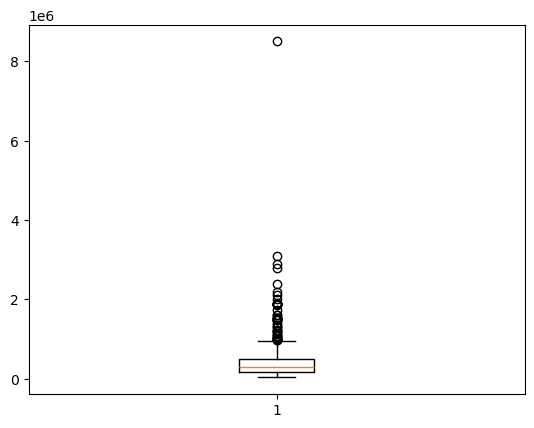

In [140]:
plt.boxplot(df['Price'])
plt.show()


removing one outlier in price


In [146]:
df = df[df['Price']<6000000]
df.reset_index(drop=True)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
810,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
811,Tata Indica V2,Tata,2009,110000,30000,Diesel
812,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
813,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [147]:
df.shape

(815, 6)

string clean data ro new file

In [148]:
df.to_csv("clean_car_data.csv")

In [153]:
X = df.drop(columns=['Price'])
y = df['Price']

In [156]:
y.shape

(815,)

Train test split


In [193]:
X_train , X_test , y_train , y_test = train_test_split(X , y,test_size=0.2 , random_state=302)

,name,company,year,kms_driven,fuel_type
790,Tata Indigo eCS,Tata,2016,150000,Diesel
427,Nissan X Trail,Nissan,2019,300,Diesel
766,Mahindra KUV100 K8,Mahindra,2018,8000,Diesel
540,Maruti Suzuki Wagon,Maruti,2009,27000,Petrol
291,Skoda Fabia 1.2L,Skoda,2011,38200,Diesel
...,...,...,...,...,...
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
174,Mahindra Scorpio S10,Mahindra,2015,97200,Diesel
625,Hyundai Verna 1.6,Hyundai,2018,42000,Diesel
257,Maruti Suzuki Eeco,Maruti,2015,9300,Petrol


In [194]:
column_transfer = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), ['name', 'company', 'fuel_type']),
    remainder='passthrough'
)


In [195]:
pipe = make_pipeline(column_transfer , LinearRegression())

In [196]:
pipe.fit(X_train , y_train)

c:\Users\Nirav Rupapara\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [197]:
y_pred = pipe.predict(X_test)

In [198]:
print("r2 score : " ,r2_score(y_test , y_pred))

r2 score :  0.76348013961626


In [199]:
import pickle

In [200]:
with open("linear_regression_model.pkl" , "wb") as f:
    pickle.dump(pipe , f)